In [6]:
!mkdir -p ~/.kaggel
!cp kaggle.json ~/.kaggel/

In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:08<00:00, 152MB/s]
100% 1.06G/1.06G [00:09<00:00, 126MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [10]:
#Generator

# Training dataset
train_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

# Validation dataset
validation_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label
train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [12]:
#CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = 2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
history = model.fit(train_dataset, epochs = 10, validation_data = validation_dataset)

Epoch 1/10
625/625 [==============================] - 77s 107ms/step - loss: 1.5787 - accuracy: 0.5843 - val_loss: 0.6771 - val_accuracy: 0.6112
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5813 - accuracy: 0.7020 - val_loss: 0.5719 - val_accuracy: 0.7024
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4893 - accuracy: 0.7661 - val_loss: 0.5213 - val_accuracy: 0.7518
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4218 - accuracy: 0.8068 - val_loss: 0.4583 - val_accuracy: 0.7818
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3657 - accuracy: 0.8397 - val_loss: 0.5867 - val_accuracy: 0.7198
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2985 - accuracy: 0.8723 - val_loss: 0.4800 - val_accuracy: 0.7750
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2327 - accuracy: 0.9042 - val_loss: 0.5733 - val_ac

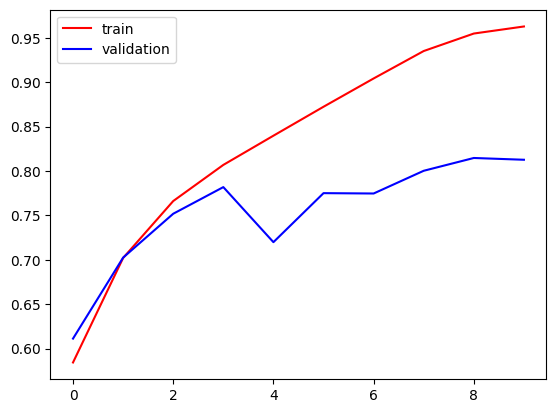

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label ='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label ='validation')
plt.legend()
plt.show()

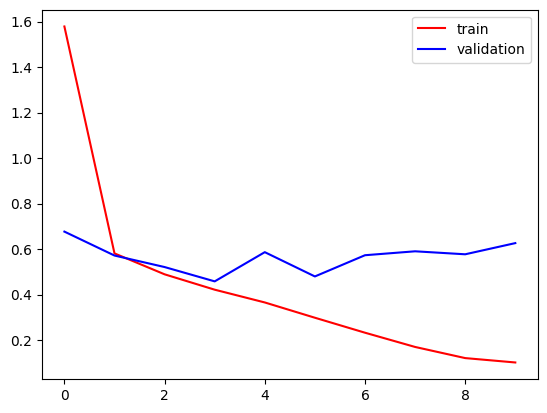

In [18]:
plt.plot(history.history['loss'], color = 'red', label ='train')
plt.plot(history.history['val_loss'], color = 'blue', label ='validation')
plt.legend()
plt.show()

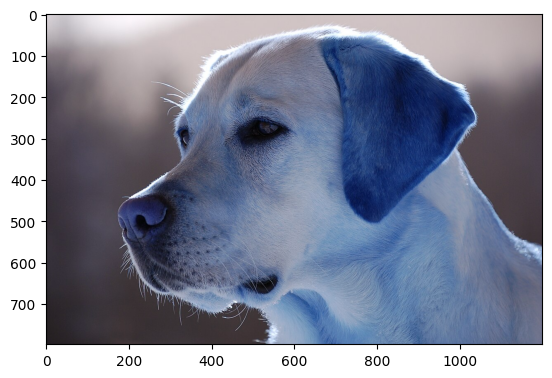

In [28]:
import matplotlib.pyplot as plt
import cv2

test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)
plt.show()

In [29]:
test_img.shape

(798, 1200, 3)

In [30]:
test_img = cv2.resize(test_img,(256,256))

In [31]:
test_input = test_img.reshape(1,256,256,3)

In [32]:
prediction = model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


In [33]:
if(prediction == 0):
  print("System says it is a CAT!")
else:
  print("System says it is a DOG!")

System says it is a DOG!


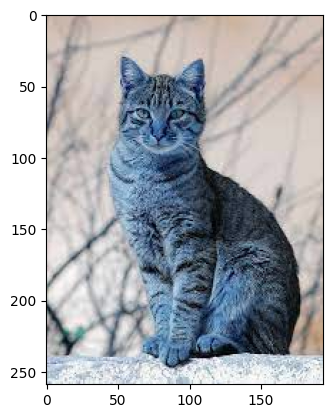

In [34]:
test_img = cv2.imread('/content/cat.jpeg')
plt.imshow(test_img)
plt.show()

In [35]:
test_img.shape

(259, 194, 3)

In [36]:
test_img = cv2.resize(test_img,(256,256))

In [37]:
test_input = test_img.reshape(1,256,256,3)

In [38]:
prediction = model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


In [39]:
if(prediction == 0):
  print("System says it is a CAT!")
else:
  print("System says it is a DOG!")

System says it is a CAT!
